# Data Preperation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# to ignore futurewarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

adult = pd.read_csv('adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

print(adult.shape)
adult.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
adult.describe(include = 'O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
for c in adult.describe(include = 'O').columns:
    print (c, ': \n', adult[c].unique(), '\n')

workclass : 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital_status : 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation : 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship : 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race : 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex : 
 [' Male' ' Female'] 

native_country : 
 [

Quick glance, we have '?' value in workclass, occupation and native_country. Let's dig deeper into this

In [6]:
for c in ['workclass', 'occupation', 'native_country']:
    print(adult[c].value_counts(), '\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64 

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                

Couple things to see here:

- For workclass and native country, it seems like the missing value can be updated as the median of that value. We can do this because there are only around 5% and 2% (respectively) missing from the entire dataset.
- For occupation, we can't really use the median as the top 6~7 jobs are pretty close to each other. For now, let's add this column to our list of drop items.

In [7]:
median_workclass = adult['workclass'].value_counts().index[0]
median_native_country = adult['native_country'].value_counts().index[0]

adult = adult.replace({'workclass':{' ?': median_workclass},
              'native_country': {' ?': median_native_country}})

In [8]:
adult.describe(include='O')[['workclass','native_country']]

,workclass,native_country
count,32561,32561
unique,8,41
top,Private,United-States
freq,24532,29753


We now have a true unique value for these two columns.

Let's drop columns we don't need next.

In [9]:
to_drop = ['fnlwgt', 'occupation']

adult.drop(columns = to_drop, inplace = True)

Next, we will create labels for every column thats categorical

In [10]:
from sklearn.preprocessing import LabelEncoder

for c in adult.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    le.fit(adult[c])
    label = le.transform(adult[c])
    adult['{0}_label'.format(c)] = label
    

#drop categorical columns after label creation    
adult.drop(columns = adult.select_dtypes(include = 'object').columns, inplace = True)

In [11]:
adult.head(5)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_label,education_label,marital_status_label,relationship_label,race_label,sex_label,native_country_label,income_label
0,39,13,2174,0,40,6,9,4,1,4,1,38,0
1,50,13,0,0,13,5,9,2,0,4,1,38,0
2,38,9,0,0,40,3,11,0,1,4,1,38,0
3,53,7,0,0,40,3,1,2,0,2,1,38,0
4,28,13,0,0,40,3,9,2,5,2,0,4,0


We will now work with continuous variables.

In this case it will be: age, education_num, captial_gain, capital_loss and hours_per_week

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E768447B00>,
      dtype=object)

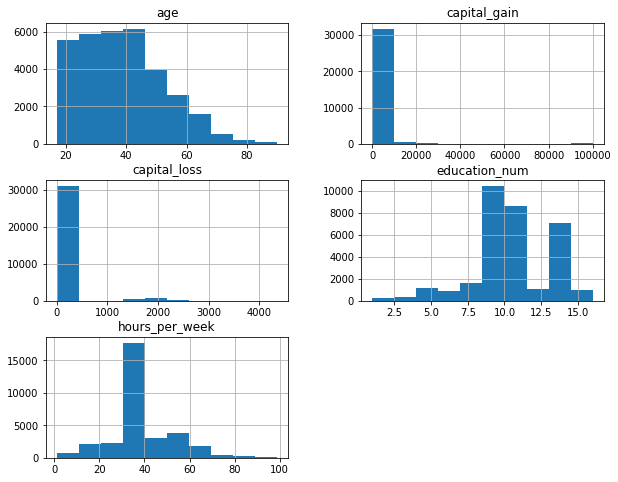

In [12]:
adult[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].hist(figsize = (10,8))

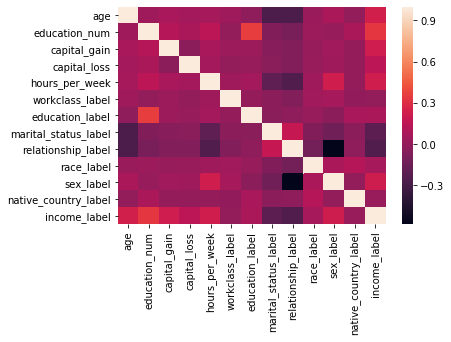

In [13]:
import seaborn as sns
sns.heatmap(adult.corr())

Few things to note:
- Capital Gain and Loss are mostly 0, let's go ahead and drop these columns as they provide no value.
- Let's also drop education_num because it correlates with our education label. the higher the person's education, the more number of hours they put in (obviously)
- let's take age and hours_per_week and bin it by 10s (example: 0-10, 10-20...) since they are continuous variables

In [14]:
for c in ['age', 'hours_per_week']:
    bins = list(range(0, adult[c].max() + 10, 10))
    labels = list(range(1,len(bins)))
    adult['{0}_binned'.format(c)] = pd.cut(adult[c], bins=bins, labels = labels)
    
#Drop the columns used for binning and 'education_num', 'capital_gain' and 'capital_loss'
adult.drop(columns = ['education_num','age','hours_per_week','capital_gain', 'capital_loss'], inplace = True)

In [15]:
adult.head()

,workclass_label,education_label,marital_status_label,relationship_label,race_label,sex_label,native_country_label,income_label,age_binned,hours_per_week_binned
0,6,9,4,1,4,1,38,0,4,4
1,5,9,2,0,4,1,38,0,5,2
2,3,11,0,1,4,1,38,0,4,4
3,3,1,2,0,2,1,38,0,6,4
4,3,9,2,5,2,0,4,0,3,4


# Model Selection

Note: we will use income_label as our y variable (what we are trying to predict). 0 is <=50k income, 1 is >50k income.

In [16]:
#First split data into training and testing

import numpy as np
from sklearn.model_selection import train_test_split

X = adult.drop(columns= ['income_label'])
y = adult['income_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

In [18]:
# Support Vector Classification
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction = svm.predict(X_test)

In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

In [20]:
predictions = [{'name': 'Naive Baynes', 'predict': gnb_prediction, 'model': gnb },
               {'name': 'Support Vector Classification', 'predict': svm_prediction, 'model': svm },
               {'name': 'Random Forest', 'predict': rf_prediction, 'model': rf }]

def show_result(fn):
    for p in predictions:
        fn(p)

In [21]:
from sklearn.metrics import classification_report

def show_classification_report(prediction):
    report = classification_report(y_test, prediction['predict'])
    print(prediction['name'], ':', '\n', report)
    
show_result(show_classification_report)

Naive Baynes : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      6303
           1       0.48      0.70      0.57      1838

    accuracy                           0.76      8141
   macro avg       0.69      0.74      0.70      8141
weighted avg       0.80      0.76      0.77      8141

Support Vector Classification : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6303
           1       0.64      0.52      0.57      1838

    accuracy                           0.83      8141
   macro avg       0.75      0.72      0.73      8141
weighted avg       0.82      0.83      0.82      8141

Random Forest : 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      6303
           1       0.62      0.54      0.58      1838

    accuracy                           0.82      8141
   macro avg       0.75      0.72      0.73      8141
weigh

In [22]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(prediction):
    matrix = confusion_matrix(y_test, prediction['predict'])
    print(prediction['name'], ': \n', matrix)
    
show_result(show_confusion_matrix)

Naive Baynes : 
 [[4908 1395]
 [ 557 1281]]
Support Vector Classification : 
 [[5774  529]
 [ 890  948]]
Random Forest : 
 [[5697  606]
 [ 841  997]]


It goes:
- top left: True Positive
- top right: False Positive
- Bottom left: False Negative
- Bottom Right: True Negative

In [23]:
from sklearn.model_selection import cross_val_score

def show_cross_val_scores(prediction):
    score = cross_val_score(prediction['model'], X, y, cv = 3)
    print('Cross validation scores for 3 folds for ', prediction['name'], ': \n', score)
    
show_result(show_cross_val_scores)

Cross validation scores for 3 folds for  Naive Baynes : 
 [0.75741662 0.75253363 0.75536718]
Cross validation scores for 3 folds for  Support Vector Classification : 
 [0.81278791 0.8222775  0.82345895]
Cross validation scores for 3 folds for  Random Forest : 
 [0.8113138  0.81582827 0.81968119]


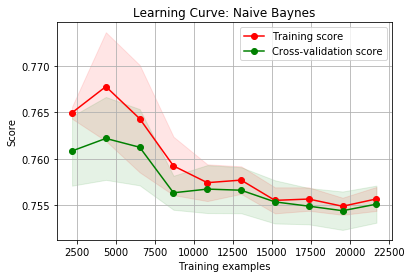

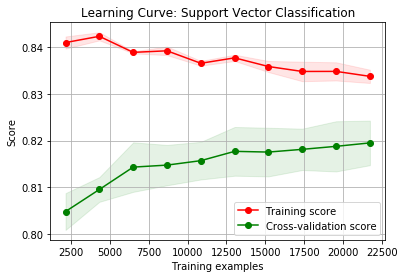

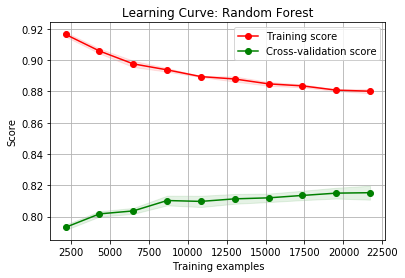

In [24]:
from sklearn.model_selection import learning_curve

def show_learning_curve(prediction):
    plt.figure()
    plt.title('Learning Curve: {0}'.format(prediction['name']))
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(prediction['model'], X, y, train_sizes = np.linspace(0.1,1.0,10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

show_result(show_learning_curve)

# Conclusion

The 3 models we chose to use were Naive Bayes, SVM and Random Forest.

- Naive Bayes: has the highest bias and the lowest prediction %. Collecting more data utilizing this model will not be effective
         Next Steps: 
                - fine tune hyperparameters (using GridSearch for example) to make the model more useful.
                - Change some feature engineering aspects
- SVM: has the high variance and the highest prediction %. Collecting more data utilizing this model will help make a more accurate prediction
         Next Steps: 
                 - fine tune hyperparameters or gather more data
                 - Change some feature engineering aspects
- Random Forest: has the highest variance and a high prediction %. Gathering more data in the long run will beat out SVM
        Next Steps:
                -fine tune hyperparameters or gather more data
                - change some feature engineering aspects
        
With what we have so far, and using the standard hyperparameters from sklearn, I suggest using SVM as it gives the highest accuracy. 